In [34]:
### imports ###
import matplotlib.pyplot as plt
plt.style.use("classic")
import numpy as np
from scipy import stats
from scipy.special import gamma

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

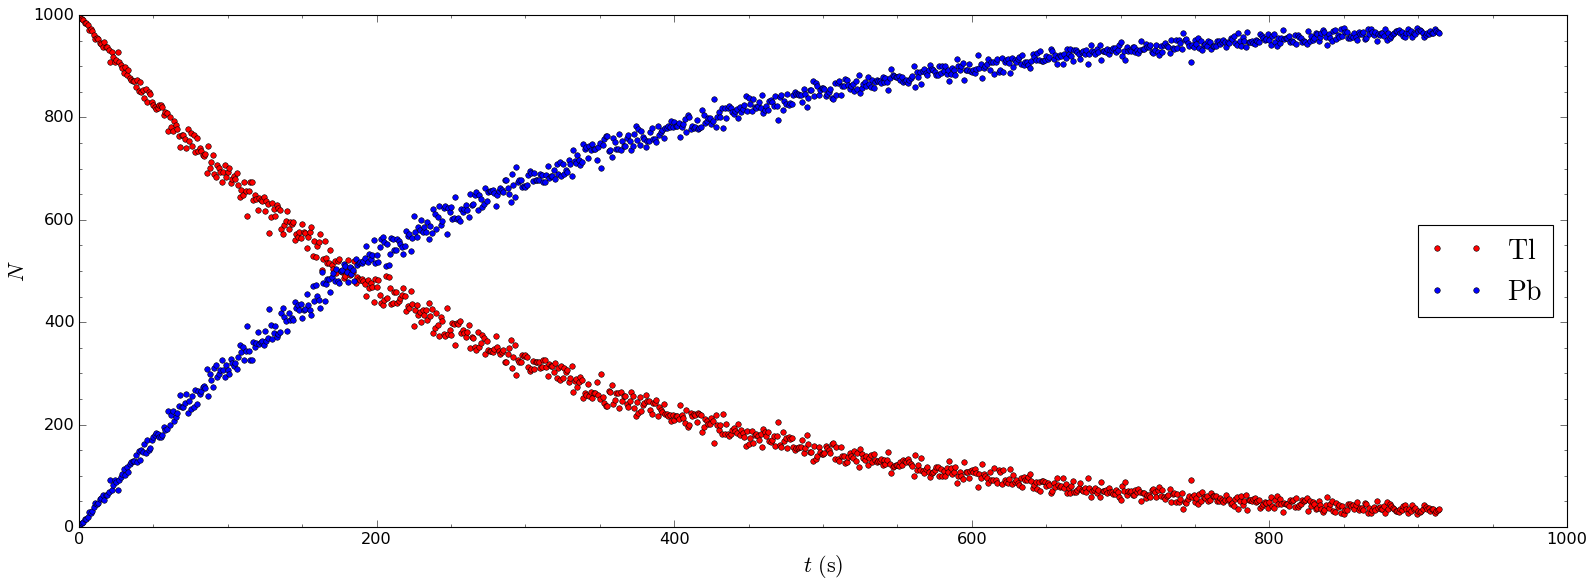

In [36]:
n0 = 1000
halflife = 3.052 * 60 # seconds
t = np.arange(int(5*halflife))

Tl_plot = []
Pb_plot = []

for ts in t:
    p = 1 - 2 ** (-ts / halflife)

    x = np.random.uniform(low = 0, high = 1, size = n0)
    n_Tl = n0 - len(x[x<p])

    Tl_plot.append(n_Tl)
    Pb_plot.append(n0-n_Tl)

fig, ax = plt.subplots(); fig.patch.set_facecolor("xkcd:white")
plt.rcParams['figure.figsize'] = [24, 8]

ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)

ax.set_xlabel("$t\ (\mathrm{s})$", fontsize = 20)
ax.set_ylabel("$N$", fontsize = 20)
ax.plot(t, Tl_plot, marker = 'o', markersize = 5, c = 'red', lw = 0, label = "${{\\rm Tl}}$")
ax.plot(t, Pb_plot, marker = 'o', markersize = 5, c = 'blue', lw = 0, label = "${{\\rm Pb}}$")
ax.legend(loc = "best", fontsize = 25)

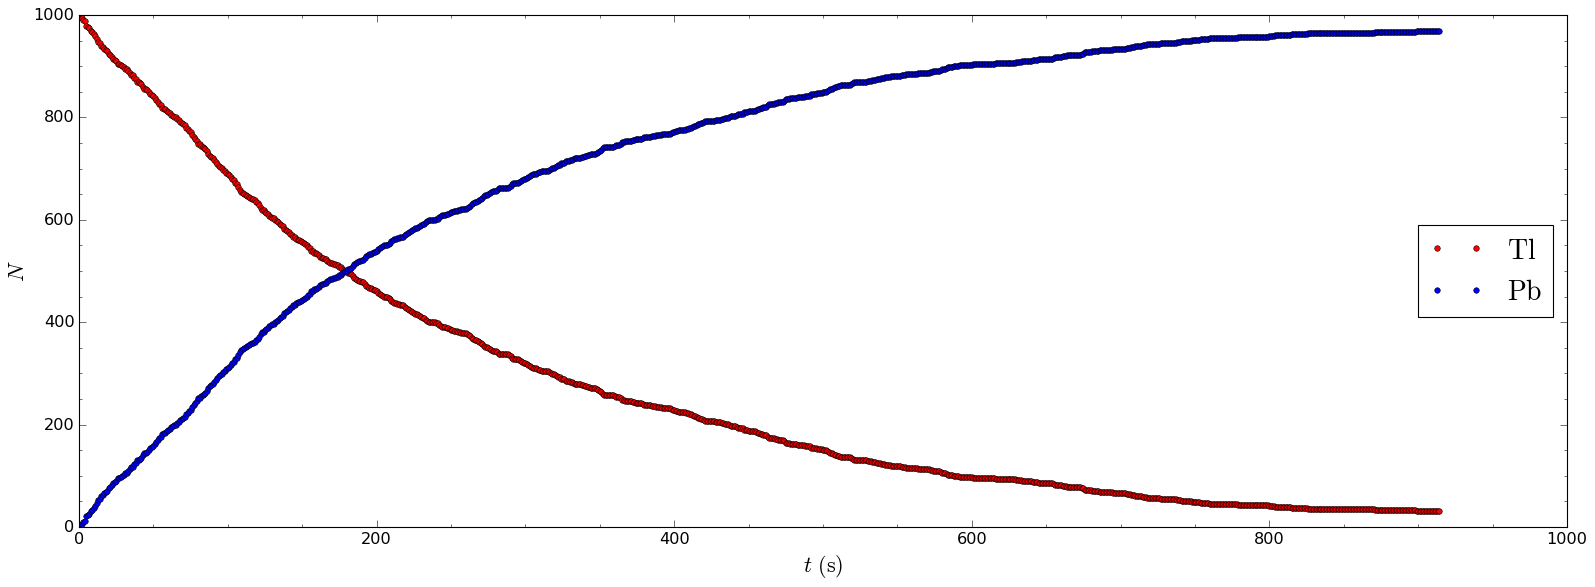

In [37]:
def expon_pdf(x, mu = np.log(2) / halflife):
    return mu * np.exp(-mu * x)

def expon_cdf(x, mu = np.log(2) / halflife):
    return 1 - np.exp(-mu * x)

def expon_icdf(p, mu = np.log(2) / halflife):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1 - p)/mu

x = np.random.uniform(0, 1, n0)
y = expon_icdf(x)


Tl_plot = []
Pb_plot = []

for ts in t:
    n_Tl = n0 - len(y[y<ts])
    Tl_plot.append(n_Tl)
    Pb_plot.append(n0-n_Tl)


fig, ax = plt.subplots(); fig.patch.set_facecolor("xkcd:white")
plt.rcParams['figure.figsize'] = [24, 8]
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)

ax.set_xlabel("$t\ (\mathrm{s})$", fontsize = 20)
ax.set_ylabel("$N$", fontsize = 20)
ax.plot(t, Tl_plot, marker = 'o', markersize = 5, c = 'red', lw = 0, label = "${{\\rm Tl}}$")
ax.plot(t, Pb_plot, marker = 'o', markersize = 5, c = 'blue', lw = 0, label = "${{\\rm Pb}}$")
ax.legend(loc = "best", fontsize = 25)



2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The integral with the accept/reject method is: 1.34707 +/- 0.00094


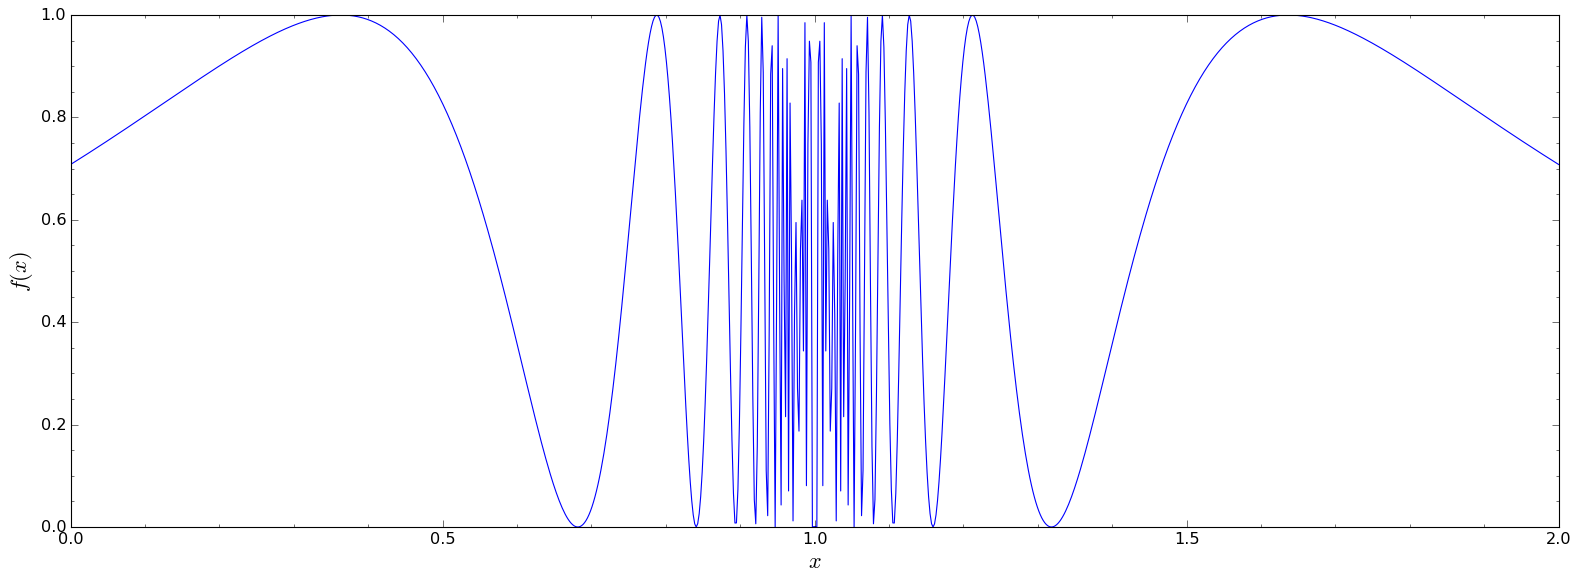

In [38]:
fig, ax = plt.subplots(); fig.patch.set_facecolor("xkcd:white")
plt.rcParams['figure.figsize'] = [24, 8]
ax.tick_params(which = 'both', axis = 'both', direction='in', right = True, top = True, length = 6)
ax.minorticks_on()
ax.tick_params(which = 'minor', axis = 'both', direction='in', right = True, top = True, length = 3)
ax.tick_params(axis = 'both', labelsize = 14.5)
ax.set_xlabel("$x$", fontsize = 20)
ax.set_ylabel("$f(x)$", fontsize = 20)

def f(x):
    return (np.sin(1 / (1-x)))**2

x = np.linspace(0, 2, 1000)
y = f(x)
ax.plot(x, y)

iterations = 100
N = 10000
count = 0
ints = []
for j in range(iterations):
    count = 0
    for i in range(N):
        u = 1 + np.random.random() # x is random uniform between 1 and 2
        v = np.random.random() # y is random uniform between 0 and 1
        if v < f(u): count += 1
    I = 2 * count / N # where we have used the even parity of the function
    ints.append(I)

integral = np.mean(ints)
uintegral = np.std(ints) / np.sqrt(iterations)
print("The integral with the accept/reject method is: %1.5f +/- %1.5f" % (integral, uintegral))

In [39]:
x = np.linspace(0, 2, N)
mean_value = 1 / N * np.sum(f(x))

V = 2
integral2 = V * mean_value
uintegral2 = V * np.sqrt(np.std(f(x))) / np.sqrt(N)
print("The integral with the mean_value method is: %1.3f +/- %1.3f" % (integral2, uintegral2))

The integral with the mean_value method is: 1.348 +/- 0.011


In [40]:
I_true = 1.34691
print("True value of integral: ", I_true)

er_acceptreject = np.abs(integral - I_true) / I_true * 100
er_meanvalue = np.abs(integral2 -  I_true) / I_true * 100
print("Integral with the accept-reject method has a relative error of %1.4f" % er_acceptreject, "%.")
print("Integral with the mean-value method has a relative error of %1.4f" % er_meanvalue, "%.")

True value of integral:  1.34691
Integral with the accept-reject method has a relative error of 0.0117 %.
Integral with the mean-value method has a relative error of 0.0544 %.


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [41]:
def f(x):
    if x[0]**2 + x[1]**2 <= 1:
        return 1
    else:
        return 0

N = 10000
V = 2 * 2
iterations = 10
integrals = []
for i in range(iterations):
    count = 0
    for j in range(N):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if f([x, y]) == 1: count += 1
    
    integrals.append(V * count / N)


I = np.mean(integrals)
uI = np.std(integrals) / np.sqrt(iterations)
print("The integral with the accept/reject method is: %1.4f +/- %1.4f" % (I, uI))

The integral with the accept/reject method is: 3.1411 +/- 0.0054


In [42]:
# for a 10D sphere the result generalizes naturally
def f(x):
    if np.sum(np.dot(x,x)) <= 1:
        return 1
    else:
        return 0

D = 10
N = 100000
radius = 1
iterations = 10


V = 2 ** D
integrals = []
for i in range(iterations):
    count = 0
    for j in range(N):
        x = np.random.uniform(-1, 1, size = D) # generate D random uniform distr
        if f(x) == 1: count += 1
    
    integrals.append(V * count / N)


I = np.mean(integrals)

print("The integral with the accept/reject method for a %i-dim ball is: %1.3f" % (D, I))

Volume_Nball = (np.pi ** (D/2)) / (gamma(D/2 + 1)) * radius ** D
print("It should be: ", Volume_Nball)
print("The relative error is %1.3f" % (np.abs(Volume_Nball - I) / Volume_Nball * 100), "%.")

The integral with the accept/reject method for a 10-dim ball is: 2.564
It should be:  2.550164039877345
The relative error is 0.546 %.


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [43]:
def f(x):
    return x ** (-1. / 2.) / (np.exp(x) + 1)
def w(x):
    return 1 / np.sqrt(x)

ax.plot(np.linspace(1e-5, 1, 1000), f(np.linspace(1e-5, 1, 1000)), color = "blue")
ax.fill_between(0, f(np.linspace(1e-5, 1, 1000)), color = "blue")
N = int(1e5)
x = np.random.uniform(int(1e-5), 1, N) ** 2 # doing the square to concentrate the samples at 0 (where the integral diverges)

int_w = 2 # integral of w(x) from 0 to 1 (trivial)
I = 1 / N * np.sum(f(x) / w(x)) * int_w

I_true = 0.838932960
print("True value of integral: ", I_true)
print("The integral with the importance sampling method is: %1.5f" % I)
print("The relative error is: %1.5f" % (np.abs((I_true - I) / I_true) * 100), "%.")

True value of integral:  0.83893296
The integral with the importance sampling method is: 0.83907
The relative error is: 0.01588 %.
